# Power Law Spectrum in Momentum space
Checks and Plots

In [1]:
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates.sky_coordinate import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
from astropy import constants as const
from astropy.wcs import WCS
from ClusterModel import model
from ClusterModel import model_modpar
from ClusterModel import model_tools

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster(name='Coma', 
                      redshift=0.023, M500=7e14*u.Msun, 
                      cosmology=cosmo, silent=True, 
                      output_dir='/home/astrogamma/Project/Output/TestClusterModel')


Rémi's Example

In [ ]:
import astropy.constants as const
alpha = -2.5
p   = np.logspace(-1, 5, 1000)*u.MeV/const.c
E   = np.sqrt(p**2*const.c**2 + const.m_e**2*const.c**4)
p0  = 1*u.MeV/const.c
A   = 1.0*p0.unit**-1

f_p = A*(p/p0)**alpha
f_E = f_p/p * E/const.c**2

plt.loglog(p, f_E)

# Works: Baby steps
Try with baby steps

In [ ]:
clust.Eemin

In [ ]:
(const.m_e*const.c**2).to('GeV')

In [ ]:
m = const.m_e
energy=np.logspace(1,10,100)*u.keV
energy_gev = energy.to_value('GeV')
momentum = np.sqrt(energy_gev**2 - ((m *const.c**2).to_value('GeV'))**2) / const.c.to_value('m/s')

In [3]:
def momentumpowerlaw_model(energy_gev, k0, index, m = const.m_e,  
                           Eemin = const.m_e*const.c**2,E0=1.0):
    """
    Compute a PowerLaw spectrum in momentum space

    Parameters
    ----------
    - energy_GeV: scalar or vector
    - k0 : normalization
    - E0 : pivot energy (GeV)
    - index : spectral index

    Outputs
    --------
    - spectrum
    """
    

    P0 = np.sqrt(E0**2 - ((m *const.c**2).to_value('GeV'))**2) / const.c.to_value('m/s')

    
    momentum = np.sqrt(energy_gev**2 - ((m *const.c**2).to_value('GeV'))**2) / const.c.to_value('m/s')

    fP = k0 * (momentum/P0)**(-index)
    dP = (energy_gev/const.c.to_value('m/s'))  / np.sqrt(energy_gev**2 - ((m *const.c**2).to_value('GeV'))**2)

    
    SE = fP*dP
    SE[energy_gev < Eemin.to_value('GeV')] *= 0
    
    return SE


/home/astrogamma/.local/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/home/astrogamma/.local/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


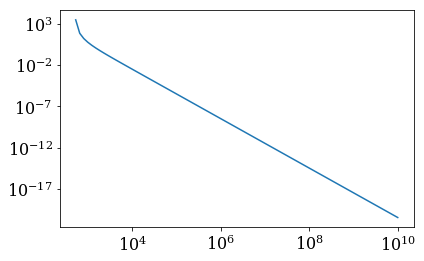

In [4]:
energy=np.logspace(1,10,100)*u.keV

c = momentumpowerlaw_model(energy.to_value('GeV'), 1.0, 3, const.m_e)
plt.loglog(energy, c,label = 'Normed Cre1 vv')
plt.show()

/home/astrogamma/Project/Software/ClusterModel/ClusterTools/cluster_spectra.py:111: RuntimeWarning: invalid value encountered in sqrt
  momentum = np.sqrt(energy_gev**2 - ((m *const.c**2).to_value('GeV'))**2) / const.c.to_value('m/s')
/home/astrogamma/Project/Software/ClusterModel/ClusterTools/cluster_spectra.py:114: RuntimeWarning: invalid value encountered in sqrt
  dP = (energy_gev/const.c.to_value('m/s'))  / np.sqrt(energy_gev**2 - ((m *const.c**2).to_value('GeV'))**2)


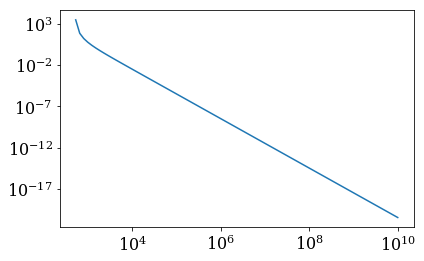

In [5]:
from ClusterModel.ClusterTools import cluster_spectra

b =  cluster_spectra.momentumpowerlaw_model(energy.to_value('GeV'), 1.0, 3,  const.m_e)
plt.loglog(energy, b)
plt.show()

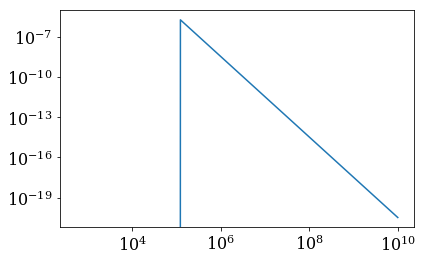

In [7]:

clust.spectrum_cre1_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_e ,
                             'Eemin': 200*const.m_e*const.c**2}
a = clust._get_generic_spectrum(energy, clust._spectrum_cre1_model)
plt.loglog(energy, a)
plt.show()

## Check index

In [ ]:
from ClusterModel.ClusterTools import cluster_spectra

plt.figure(figsize=(10,5))
energy=np.logspace(1,10,100)*u.keV
b =  cluster_spectra.momentumpowerlaw_model(energy.to_value('GeV'), 1.0, 3)
plt.loglog(energy, b*energy**3,label = 'Normed Cre1 momentum')
b =  cluster_spectra.powerlaw_model(energy.to_value('GeV'), 1.0, 3)
plt.loglog(energy, b*energy**3,label = 'Normed Cre1')

c = momentumpowerlaw_model(energy.to_value('GeV'), 1.0, 3, const.m_p)
plt.loglog(energy, c*energy**3,label = 'Normed Cre1 vv')
plt.legend()
plt.grid()

# CRe1: Normed and not normed Spectra and Density profiles

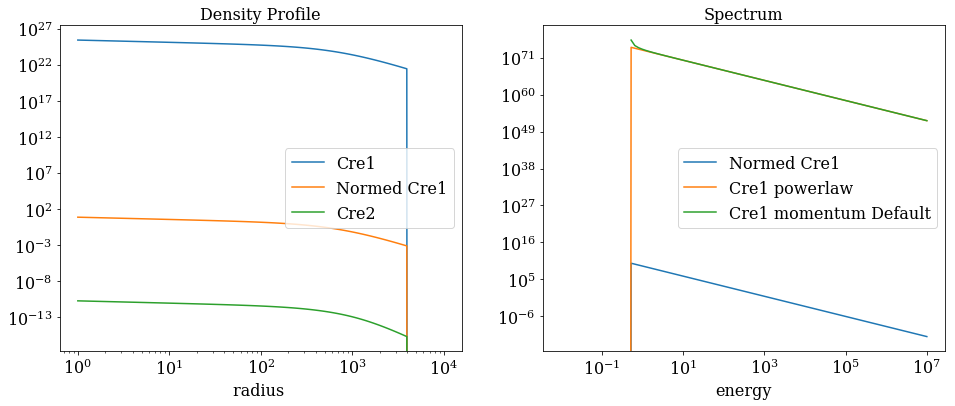

In [11]:
radius=np.logspace(0,4,100)*u.kpc
energy=np.logspace(-2,7,100)*u.MeV

# The simplest plots: density profile and spectrum
plt.figure(figsize=(15,6))
plt.subplot(121)

a,b = clust.get_density_cre1_profile(radius)
plt.loglog(a,b, label='Cre1')
a, b = clust.get_normed_density_cre1_profile(radius)
plt.loglog(a, b, label='Normed Cre1')
a,b = clust.get_density_cre2_profile(radius)
plt.loglog(a,b, label='Cre2')
plt.xlabel('radius ')
plt.title("Density Profile")
plt.legend()


plt.subplot(122)
clust.spectrum_cre1_model = {'name':  'PowerLaw', 'Index': 3.}
a, b = clust.get_normed_cre1_spectrum(energy)
plt.loglog(a, b,label = 'Normed Cre1')
a, b = clust.get_cre1_spectrum(energy)
plt.loglog(a,b, label = 'Cre1 powerlaw')
a, b = clust.get_cre2_spectrum(energy)
#plt.loglog(a,b, label = 'Cre2')
clust.spectrum_cre1_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_e}
a, b = clust.get_normed_cre1_spectrum(energy)
#plt.loglog(a, b,label = 'Normed Cre1 momentum')
a, b = clust.get_cre1_spectrum(energy)
plt.loglog(a,b, label = 'Cre1 momentum Default')
plt.xlabel('energy')
plt.title("Spectrum")
plt.legend()

In [ ]:
clust.Eemin

## Norm check

('protons normal', <Quantity [5.56566825e-10] 1 / (cm3 GeV)>)
('momentum n', <Quantity [0.16685457] 1 / (cm3 GeV)>)


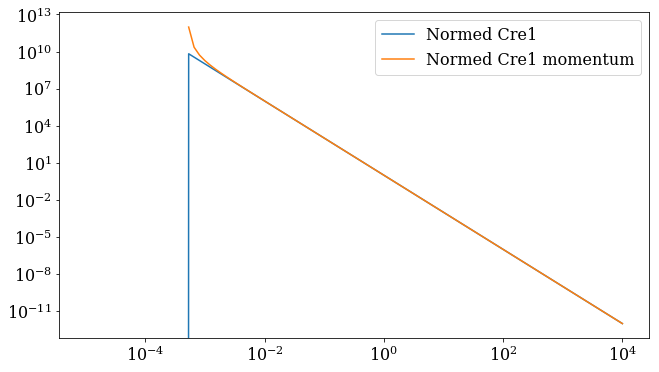

In [10]:
#clust.Eemin = (const.m_e*const.c**2)+50*u.keV

plt.figure(figsize=(10,6))

clust.spectrum_cre1_model = {'name':  'PowerLaw', 'Index': 3.}
print("protons normal", clust._get_cre1_normalization())
a, b = clust.get_normed_cre1_spectrum(energy)
plt.loglog(a.to_value('GeV'), b,label = 'Normed Cre1')
b = clust._get_generic_spectrum(energy, clust.spectrum_cre1_model)
#plt.loglog(energy , b,label = 'generic Cre1 energy')
clust.spectrum_cre1_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass' : const.m_e}
print("momentum n", clust._get_cre1_normalization())
a, b = clust.get_normed_cre1_spectrum(energy)
plt.loglog(a.to_value('GeV'), b/3.33563986699e-09,label = 'Normed Cre1 momentum')
b = clust._get_generic_spectrum(energy, clust.spectrum_cre1_model)
#plt.loglog(energy , b,label = 'generic Cre1 momentum')

plt.legend()


## Cr normalizations

In [ ]:
clust.spectrum_cre1_model = {'name':  'PowerLaw', 'Index': 3.}
clust._get_cre1_normalization()

In [ ]:
clust.spectrum_cre1_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_e}
clust._get_cre1_normalization()

In [ ]:
clust.spectrum_crp_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_p}
clust._get_crp_normalization()

In [ ]:
clust.spectrum_crp_model = {'name':  'PowerLaw', 'Index': 3.}
clust._get_crp_normalization()

# CRp and CRe: Playing with Minimum Energy

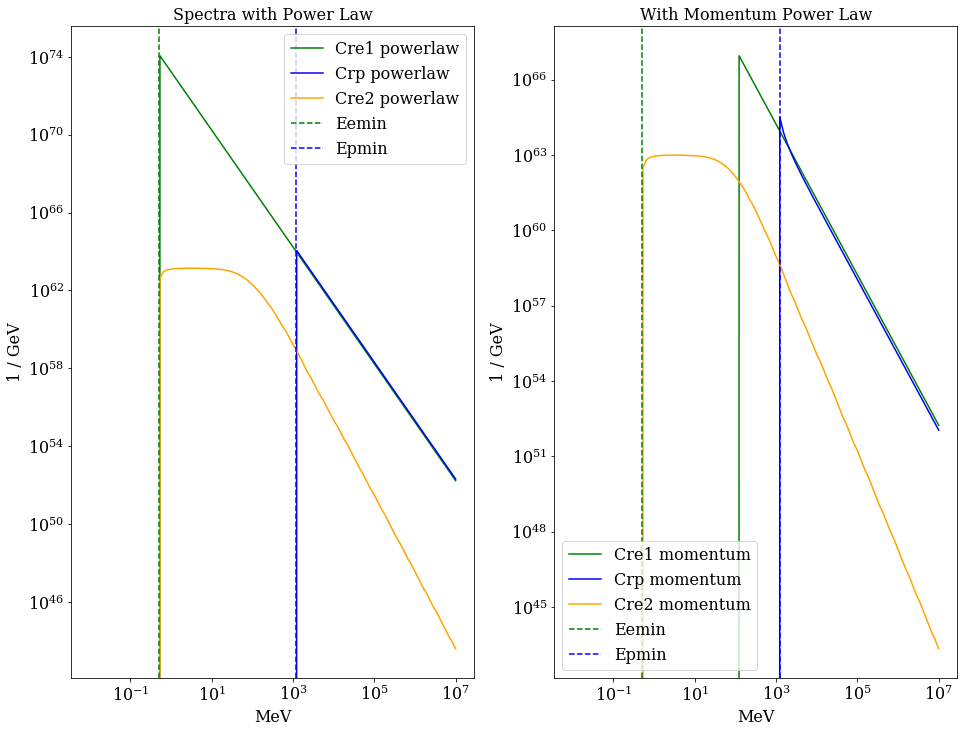

In [9]:
energy=np.logspace(-2,7,100)*u.MeV


plt.figure(figsize = (15,12))
plt.subplot(121)
clust.spectrum_cre1_model = {'name':  'PowerLaw', 'Index': 3.}
clust.spectrum_crp_model = {'name':  'PowerLaw', 'Index': 3.}
a, b = clust.get_cre1_spectrum(energy)
plt.loglog(a,b, label = 'Cre1 powerlaw', color = "green")
a, b = clust.get_crp_spectrum(energy)
plt.loglog(a,b, label = 'Crp powerlaw', color = "blue")
a, b = clust.get_cre2_spectrum(energy)
plt.loglog(a,b, label = 'Cre2 powerlaw', color = "orange")
plt.axvline(clust.Eemin.to_value('MeV'), 0,np.log10(77),  color = "green", label='Eemin', ls='--')
plt.axvline(clust.Epmin.to_value('MeV'), 0,np.log10(77),  color = "blue", label='Epmin', ls='--')
plt.title("Spectra with Power Law")
plt.xlabel(a.unit)
plt.ylabel(b.unit)
plt.legend()

plt.subplot(122)
clust.spectrum_cre1_model = {'name':  'MomentumPowerLaw', 'Index': 3., 
                              'Mass': const.m_e, 'Eemin': 200*const.m_e*const.c**2 }
clust.spectrum_crp_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_p}
g, h = clust.get_cre1_spectrum(energy)
plt.loglog(g,h, label = 'Cre1 momentum', color = "green")
a, b = clust.get_crp_spectrum(energy)
plt.loglog(a,b, label = 'Crp momentum', color = "blue")
a, b = clust.get_cre2_spectrum(energy)
plt.loglog(a,b, label = 'Cre2 momentum', color = "orange")
plt.axvline(clust.Eemin.to_value('MeV'), 0,np.log10(77), ":", color = "green", label='Eemin', ls='--')
plt.axvline(clust.Epmin.to_value('MeV'), 0,np.log10(77), ":", color = "blue", label='Epmin', ls='--')
plt.title("With Momentum Power Law")
plt.xlabel(a.unit)
plt.ylabel(b.unit)
plt.legend()


In [ ]:
energy=np.logspace(-2,7,100)*u.MeV


plt.figure(figsize = (15,12))
plt.subplot(121)
clust.spectrum_cre1_model = {'name':  'PowerLaw', 'Index': 3.}
a, b = clust.get_cre1_spectrum(energy)
plt.loglog(a,b, label = 'Cre1 powerlaw')
clust.spectrum_cre1_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_e}
g, h = clust.get_cre1_spectrum(energy)
plt.loglog(g,h, label = 'Cre1 momentum')
plt.xlabel(a.unit)
plt.ylabel(b.unit)
plt.ylim(10e54,10e78)
plt.title("CRe1")

plt.subplot(122)
clust.spectrum_crp_model = {'name':  'PowerLaw', 'Index': 3.}
a, b = clust.get_cre2_spectrum(energy)
plt.loglog(a,b, label = 'Cre2 powerlaw')
clust.spectrum_crp_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_p}
a, b = clust.get_cre2_spectrum(energy)
plt.loglog(a,b, label = 'Cre2 momentum')
plt.xlabel(a.unit)
plt.ylabel(b.unit)
plt.ylim(10e54,10e64)
plt.title("CRe2")
plt.legend()


# SYNCHROTRON


## Primary Electrons

Look only at Primary

In [ ]:
## Primary Electron Emission only 
clust.X_crp_E = {'X':0, 'R_norm': clust.R500}
clust.X_cre1_E = {'X':0.01, 'R_norm': clust.R500}
freq = np.logspace(0,3,30)*u.MHz

plt.figure(figsize = (15,6))
plt.subplot(121)
clust.spectrum_cre1_model = {'name':  'PowerLaw', 'Index': 3.}
frequency, readyspectrum = clust.get_synchrotron_spectrum(freq)
plt.loglog(frequency,readyspectrum)
plt.title("Synchrotron Spectrum with E Power Law")

plt.subplot(122)
clust.spectrum_cre1_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_e}
frequency, readyspectrum = clust.get_synchrotron_spectrum(freq)
plt.loglog(frequency,readyspectrum)
plt.title("Synchrotron Spectrum with M ")

## Protons now, secondary Electrons

In [ ]:
## Primary Electron Emission only 
clust.X_crp_E = {'X':0.01, 'R_norm': clust.R500}
clust.X_cre1_E = {'X':0.0, 'R_norm': clust.R500}
freq = np.logspace(0,3,30)*u.MHz

plt.figure(figsize = (15,6))
plt.subplot(121)
clust.spectrum_crp_model = {'name':  'PowerLaw', 'Index': 3.}
frequency, readyspectrum = clust.get_synchrotron_spectrum(freq)
plt.loglog(frequency,readyspectrum)
plt.title("Synchrotron Spectrum with E Power Law")

plt.subplot(122)
clust.spectrum_crp_model = {'name':  'MomentumPowerLaw', 'Index': 3., 'Mass': const.m_p}
frequency, readyspectrum = clust.get_synchrotron_spectrum(freq)
plt.loglog(frequency,readyspectrum)
plt.title("Synchrotron Spectrum with M ")

## Coma

In [ ]:

dat_freq = np.array([30.9,43,73.8,151,326,408,430,608.5,1380,1400,2675,2700,4850])*u.MHz
dat_flux = np.array([49,51,17,7.2,3.81,2.0,2.55,1.2,0.53,0.64,0.11,0.07,0.03])*u.Jy
dat_err  = np.array([10,13,12,0.8,0.03,0.2,0.28,0.3,0.05,0.035,0.03,0.02,0.01])*u.Jy

from scipy import optimize

dat_freq = dat_freq.to('GHz')

## Primary

In [ ]:
clust.silent = True 

def syncfitPrimarymom(x,a, ind):
    clust.X_crp_E = {'X':0, 'R_norm': clust.R500}
    clust.X_cre1_E = {'X':a, 'R_norm': clust.R500}
    clust.spectrum_cre1_model = {'name':'MomentumPowerLaw', 'Index':ind , 'Mass': const.m_e}
    return clust.get_synchrotron_spectrum(x*u.GHz)[1].to_value('Jy')


params3, params_covariance = optimize.curve_fit(syncfitPrimarymom, dat_freq.to_value('GHz'), dat_flux.to_value('Jy'), 
                                               sigma = dat_err.to_value('Jy'),
                                               p0=[0.01, 3])

print "Primary Electron Parameters: ", (params3)


## Plotting###################################################
plt.figure(figsize=(15, 10))
plt.errorbar(dat_freq.to_value('GHz'), dat_flux.to_value('Jy'), yerr = dat_err.to_value('Jy') , fmt="k.", label = "Coma Data")
#plt.scatter(dat_freq, dat_flux, label='Data')
plt.loglog(dat_freq, syncfitPrimarymom(dat_freq.to_value('GHz'), params3[0],params3[1]),
         label='Primary Electron Population')

plt.legend(loc='best')

plt.show()

In [ ]:

import matplotlib.gridspec as gridspec

def syncfitPrim(p, x):
    clust.X_crp_E = {'X':0, 'R_norm': clust.R500}
    clust.X_cre1_E = {'X':p[0], 'R_norm': clust.R500}
    clust.spectrum_cre1_model = {'name':'MomentumPowerLaw', 'Index':p[1] , 'Mass': const.m_e}
    return clust.get_synchrotron_spectrum(x*u.GHz)[1].to_value('Jy')


def residual2(pr, x, y, dy):
    return (syncfitPrim(pr,x)-y)/dy

y = dat_flux.to_value('Jy')
x = dat_freq.to_value('GHz')
p02 = [ 1.22075505, 3.81373887]
dy = dat_err.to_value('Jy')
pf2, cov2, info2, mesg2, success2 = optimize.leastsq(residual2, p02, args = (x, y, dy), full_output=1)
pf2_f, pf2_a = pf2
if success2 <= 4:
    print("Fit Converged")
    chisq2 = sum(info2["fvec"]*info2["fvec"])
    dof2 = len(x)-len(pf2)
    pferr2 = [np.sqrt(cov2[i,i]) for i in range(len(pf2))]
    diff = np.array(y - syncfitPrim(pf2, x))
    print("Converged with chi-squared ", chisq2)
    print("Number of degrees of freedom, dof =",dof2)
    print("Reduced chi-squared ", chisq2/dof2)
    print("Inital guess values:")
    print("  p0 =", p02)
    print("Best fit values:")
    print("  pf =", pf2)
    print("Uncertainties in the best fit values:")
    print("  pferr =", pferr2)
    print("residuals =", diff)
    print
    
    
    
    f, (ax1, ax2) = plt.subplots(nrows =2,sharex = True, figsize = (30,20),gridspec_kw={'height_ratios': [4,1]} )


    yerr = dy
    ax1.errorbar(x, y, yerr, fmt='k.', label = 'Data')
    #T = np.linspace(x.min(), x.max(), 2000)
    ax1.plot(x, syncfitPrim(pf2, x), 'r-', label = 'Fit')
    
   # ax1.loglog(T, fitfunc2(pf2, T), 'r-', label = 'Fit')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    
    ax1.set_title('Spectrum', fontsize = 30)
    ax1.set_xlabel('GHz', fontsize = 20)
    ax1.set_ylabel('Jy', fontsize = 20)
    ax1.tick_params(axis = 'both', which = "major", labelsize = 18)
    ax1.legend(fontsize = 20)
    
    
    
   # ax3 = fig2.add_subplot(gs[1])
    ax2.errorbar(x, diff, yerr = diff ,fmt="o")
    ax2.axhline(color="gray", zorder=-1)
    ax2.set_xlabel('GHz', fontsize = 20 )
    ax2.set_ylabel('residuals', fontsize = 20)
    ax2.tick_params(axis = 'both', which = "major", labelsize = 18)

    #ax2.set_ylim(-20, 20)
    #ax2.set_yticks((-20, 0, 20))
    

else:
    print('Fit did not converge')
    print(mesg2)


# Protons: Secondary Electrons only 

In [ ]:
clust.silent = True 

def syncfitSecondarymom(x,a, ind):
    clust.X_crp_E = {'X':a, 'R_norm': clust.R500}
    clust.X_cre1_E = {'X':0.0, 'R_norm': clust.R500}
    clust.spectrum_cre1_model = {'name':'MomentumPowerLaw', 'Index':ind , 'Mass': const.m_p}
    return clust.get_synchrotron_spectrum(x*u.GHz)[1].to_value('Jy')


params2, params_covariance = optimize.curve_fit(syncfitSecondarymom, dat_freq.to_value('GHz'), dat_flux.to_value('Jy'), 
                                               sigma = dat_err.to_value('Jy'),
                                               p0=[0.01, 3])

print "Secondary Electron Parameters: ", (params2)


## Plotting###################################################
plt.figure(figsize=(15, 10))
plt.errorbar(dat_freq.to_value('GHz'), dat_flux.to_value('Jy'), yerr = dat_err.to_value('Jy') , fmt="k.", label = "Coma Data")
#plt.scatter(dat_freq, dat_flux, label='Data')
plt.loglog(dat_freq, syncfitSecondarymom(dat_freq.to_value('GHz'), params2[0],params2[1]),
         label='Secondary Electron Emission')

plt.legend(loc='best')

plt.show()

In [ ]:

import matplotlib.gridspec as gridspec

def syncfitSec(p, x):
    clust.X_crp_E = {'X':p[0], 'R_norm': clust.R500}
    clust.X_cre1_E = {'X':0, 'R_norm': clust.R500}
    clust.spectrum_crp_model = {'name':'MomentumPowerLaw', 'Index':p[1] , 'Mass': const.m_p}
    return clust.get_synchrotron_spectrum(x*u.GHz)[1].to_value('Jy')


def residual2(pr, x, y, dy):
    return (syncfitSec(pr,x)-y)/dy

y = dat_flux.to_value('Jy')
x = dat_freq.to_value('GHz')
p02 = [ 0.03, 3.]
dy = dat_err.to_value('Jy')
pf2, cov2, info2, mesg2, success2 = optimize.leastsq(residual2, p02, args = (x, y, dy), full_output=1)
pf2_f, pf2_a = pf2
if success2 <= 4:
    print("Fit Converged")
    chisq2 = sum(info2["fvec"]*info2["fvec"])
    dof2 = len(x)-len(pf2)
    pferr2 = [np.sqrt(cov2[i,i]) for i in range(len(pf2))]
    diff = np.array(y - syncfitPrim(pf2, x))
    print("Converged with chi-squared ", chisq2)
    print("Number of degrees of freedom, dof =",dof2)
    print("Reduced chi-squared ", chisq2/dof2)
    print("Inital guess values:")
    print("  p0 =", p02)
    print("Best fit values:")
    print("  pf =", pf2)
    print("Uncertainties in the best fit values:")
    print("  pferr =", pferr2)
    print("residuals =", diff)
    print
    
    
    
    f, (ax1, ax2) = plt.subplots(nrows =2,sharex = True, figsize = (30,20),gridspec_kw={'height_ratios': [4,1]} )


    yerr = dy
    ax1.errorbar(x, y, yerr, fmt='k.', label = 'Data')
    #T = np.linspace(x.min(), x.max(), 2000)
    ax1.plot(x, syncfitSec(pf2, x), 'r-', label = 'Fit')
    
   # ax1.loglog(T, fitfunc2(pf2, T), 'r-', label = 'Fit')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    
    ax1.set_title('Spectrum', fontsize = 30)
    ax1.set_xlabel('GHz', fontsize = 20)
    ax1.set_ylabel('Jy', fontsize = 20)
    ax1.tick_params(axis = 'both', which = "major", labelsize = 18)
    ax1.legend(fontsize = 20)
    
    
    
   # ax3 = fig2.add_subplot(gs[1])
    ax2.errorbar(x, diff, yerr = diff ,fmt="o")
    ax2.axhline(color="gray", zorder=-1)
    ax2.set_xlabel('GHz', fontsize = 20 )
    ax2.set_ylabel('residuals', fontsize = 20)
    ax2.tick_params(axis = 'both', which = "major", labelsize = 18)

    #ax2.set_ylim(-20, 20)
    #ax2.set_yticks((-20, 0, 20))
    

else:
    print('Fit did not converge')
    print(mesg2)
